In [1]:
import glob
import os
import imageio
import numba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from tqdm import tqdm

In [3]:
datadir = '/data/users/julie/Data/Spots_barcode_Emily/dataset_5/output_expr_comparison/'
pp_files = sorted(glob.glob(datadir + 'original*code/*trunc.csv'))
df = pd.read_csv(pp_files[0])
df_dict_pp = dict(df.predicted_name.value_counts())
for key in df_dict_pp:
    df_dict_pp[key] = np.log10(df_dict_pp[key]+1)

In [4]:
datadir = '/data/users/julie/Data/Spots_barcode_Emily/dataset_2/output_expr_comparison/'
post_files = sorted(glob.glob(datadir + 'original*code/*trunc.csv'))
df = pd.read_csv(post_files[0])
df_dict_post = dict(df.predicted_name.value_counts())
for key in df_dict_post:
    df_dict_post[key] = np.log10(df_dict_post[key]+1)

In [5]:
datadir = '/data/users/julie/Data/Spots_barcode_Emily/dataset_2/output_expr_comparison/'
rb_2rc_files = sorted(glob.glob(datadir + 'rel*2*R*C/*trunc.csv'))
df = pd.read_csv(rb_2rc_files[0])
df_dict_2rc = dict(df.predicted_name.value_counts())
for key in df_dict_2rc:
    df_dict_2rc[key] = np.log10(df_dict_2rc[key]+1)

In [6]:
total_post = sum([10**df_dict_post[key] for key in df_dict_post])
total_2rc = sum([10**df_dict_2rc[key] for key in df_dict_2rc])
total_pp = sum([10**df_dict_pp[key] for key in df_dict_pp])
total_post, total_2rc, total_pp

(1362116.9999999998, 2101674.0, 1951577.0)

In [7]:
blank_dict_pp = {}
for key in df_dict_pp:
        
    if 'Blank' in key:
        blank_dict_pp[key] = df_dict_pp[key]
        
blank_dict_post = {}
for key in df_dict_post:
        
    if 'Blank' in key:
        blank_dict_post[key] = df_dict_post[key]
        
blank_dict_2rc = {}
for key in df_dict_2rc:
        
    if 'Blank' in key:
        blank_dict_2rc[key] = df_dict_2rc[key]

In [8]:
blank_post_total = sum([10**blank_dict_post[key] for key in blank_dict_post])
blank_2rc_total = sum([10**blank_dict_2rc[key] for key in blank_dict_2rc])
blank_pp_total = sum([10**blank_dict_pp[key] for key in blank_dict_pp])
blank_post_total, blank_2rc_total, blank_pp_total

(1959.9999999999998, 6774.999999999999, 216.0)

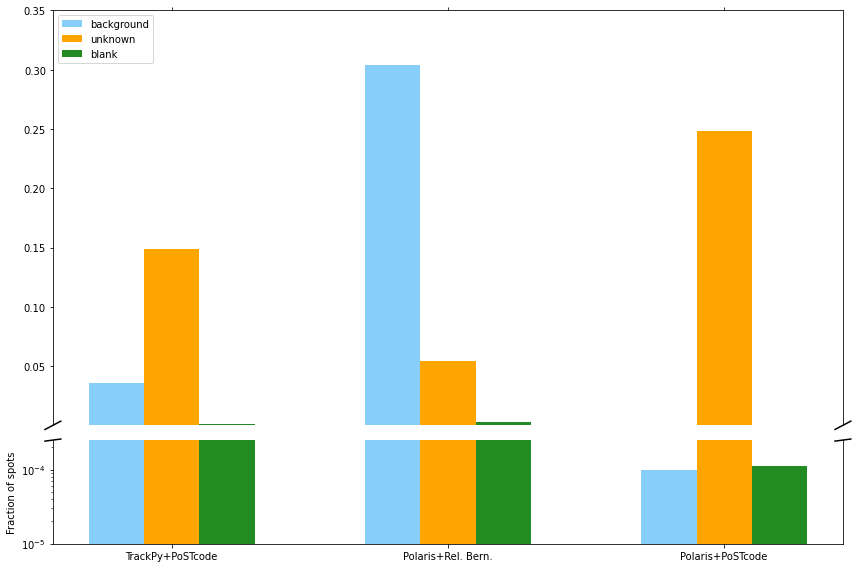

In [9]:
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,8), gridspec_kw={'height_ratios': [4, 1]})

back_post = ax.bar([1],[10**df_dict_post['background']/total_post], width=0.2, color='lightskyblue')
back_2rc = ax.bar([2],[10**df_dict_2rc['background']/total_2rc], width=0.2, color='lightskyblue')
back_pp = ax.bar([3],[10**df_dict_pp['background']/total_pp], width=0.2, color='lightskyblue')

unk_post = ax.bar([1.2],[10**df_dict_post['Unknown']/total_post], width=0.2, color='orange')
unk_2rc = ax.bar([2.2],[10**df_dict_2rc['Unknown']/total_2rc], width=0.2, color='orange')
unk_pp = ax.bar([3.2],[10**df_dict_pp['Unknown']/total_pp], width=0.2, color='orange')

blank_post = ax.bar([1.4],[blank_post_total/total_post], width=0.2, color='forestgreen')
blank_2rc = ax.bar([2.4],[blank_2rc_total/total_2rc], width=0.2, color='forestgreen')
blank_pp = ax.bar([3.4],[blank_pp_total/total_pp], width=0.2, color='forestgreen')

back_post = ax2.bar([1],[10**df_dict_post['background']/total_post], width=0.2, color='lightskyblue')
back_2rc = ax2.bar([2],[10**df_dict_2rc['background']/total_2rc], width=0.2, color='lightskyblue')
back_pp = ax2.bar([3],[10**df_dict_pp['background']/total_pp], width=0.2, color='lightskyblue')

unk_post = ax2.bar([1.2],[10**df_dict_post['Unknown']/total_post], width=0.2, color='orange')
unk_2rc = ax2.bar([2.2],[10**df_dict_2rc['Unknown']/total_2rc], width=0.2, color='orange')
unk_pp = ax2.bar([3.2],[10**df_dict_pp['Unknown']/total_pp], width=0.2, color='orange')

blank_post = ax2.bar([1.4],[blank_post_total/total_post], width=0.2, color='forestgreen')
blank_2rc = ax2.bar([2.4],[blank_2rc_total/total_2rc], width=0.2, color='forestgreen')
blank_pp = ax2.bar([3.4],[blank_pp_total/total_pp], width=0.2, color='forestgreen')

ax.set_ylim(0.00025, 0.35)  # outliers only
ax2.set_ylim(0.00001, 0.00025) 
ax2.set_yscale('log')

ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.set_xticks([1.2, 2.2, 3.2], ['TrackPy+PoSTcode', 'Polaris+Rel. Bern.', 'Polaris+PoSTcode'])
ax.legend((back_post[0], unk_post[0], blank_post[0]),
          ('background', 'unknown', 'blank'),
          loc='upper left'
         ) 
plt.ylabel('Fraction of spots')
plt.tight_layout()
# plt.savefig('/data/users/emily/publication_figures/supp_fig7-split.pdf')

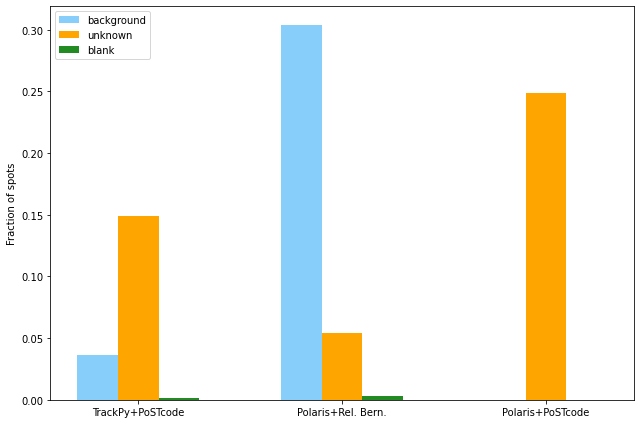

In [10]:
plt.figure(figsize=(9,6))

back_post = plt.bar([1],[10**df_dict_post['background']/total_post], width=0.2, color='lightskyblue')
back_2rc = plt.bar([2],[10**df_dict_2rc['background']/total_2rc], width=0.2, color='lightskyblue')
back_pp = plt.bar([3],[10**df_dict_pp['background']/total_pp], width=0.2, color='lightskyblue')

unk_post = plt.bar([1.2],[10**df_dict_post['Unknown']/total_post], width=0.2, color='orange')
unk_2rc = plt.bar([2.2],[10**df_dict_2rc['Unknown']/total_2rc], width=0.2, color='orange')
unk_pp = plt.bar([3.2],[10**df_dict_pp['Unknown']/total_pp], width=0.2, color='orange')

blank_post = plt.bar([1.4],[blank_post_total/total_post], width=0.2, color='forestgreen')
blank_2rc = plt.bar([2.4],[blank_2rc_total/total_2rc], width=0.2, color='forestgreen')
blank_pp = plt.bar([3.4],[blank_pp_total/total_pp], width=0.2, color='forestgreen')

plt.xticks([1.2, 2.2, 3.2], ['TrackPy+PoSTcode', 'Polaris+Rel. Bern.', 'Polaris+PoSTcode'])
plt.legend((back_post[0], unk_post[0], blank_post[0]),
          ('background', 'unknown', 'blank'),
          loc='upper left'
         ) 
plt.ylabel('Fraction of spots')
plt.tight_layout()
# plt.savefig('/data/users/emily/publication_figures/supp_fig7-linear.pdf')

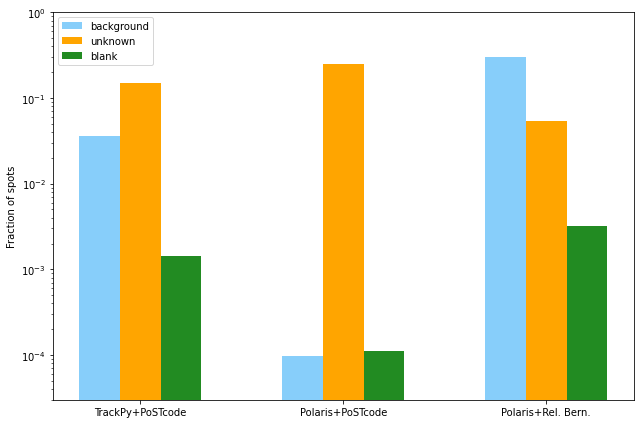

In [16]:
plt.figure(figsize=(9,6))

back_post = plt.bar([1],[10**df_dict_post['background']/total_post], width=0.2, color='lightskyblue')
back_2rc = plt.bar([3],[10**df_dict_2rc['background']/total_2rc], width=0.2, color='lightskyblue')
back_pp = plt.bar([2],[10**df_dict_pp['background']/total_pp], width=0.2, color='lightskyblue')

unk_post = plt.bar([1.2],[10**df_dict_post['Unknown']/total_post], width=0.2, color='orange')
unk_2rc = plt.bar([3.2],[10**df_dict_2rc['Unknown']/total_2rc], width=0.2, color='orange')
unk_pp = plt.bar([2.2],[10**df_dict_pp['Unknown']/total_pp], width=0.2, color='orange')

blank_post = plt.bar([1.4],[blank_post_total/total_post], width=0.2, color='forestgreen')
blank_2rc = plt.bar([3.4],[blank_2rc_total/total_2rc], width=0.2, color='forestgreen')
blank_pp = plt.bar([2.4],[blank_pp_total/total_pp], width=0.2, color='forestgreen')

plt.xticks([1.2, 2.2, 3.2], ['TrackPy+PoSTcode', 'Polaris+PoSTcode', 'Polaris+Rel. Bern.'])
plt.legend((back_post[0], unk_post[0], blank_post[0]),
          ('background', 'unknown', 'blank'),
          loc='upper left'
         ) 
plt.ylabel('Fraction of spots')
plt.yscale('log')
plt.ylim([0.00003, 1])
plt.tight_layout()
# plt.savefig('/data/users/emily/publication_figures/supp_fig7-log.pdf')